In [ ]:
#part 1 preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/Churn_Modelling.csv'
df = pd.read_csv(path)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = df.loc[:, 'CreditScore':'EstimatedSalary']
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
# Summary statistics
print(df.describe())


        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  
count  10000.00000    10000.000000     10000.000000  
mean       0.70550        0.515100    100090.239881  
std        0.45584        0.499797     57510.492818  
min        0.00000        0.000000        11.580000  


In [ ]:

# Check for missing values
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


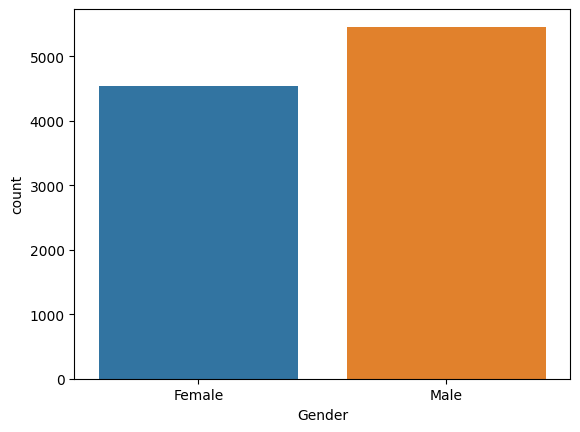

In [ ]:
sns.countplot(x='Gender', data=df)
plt.show()

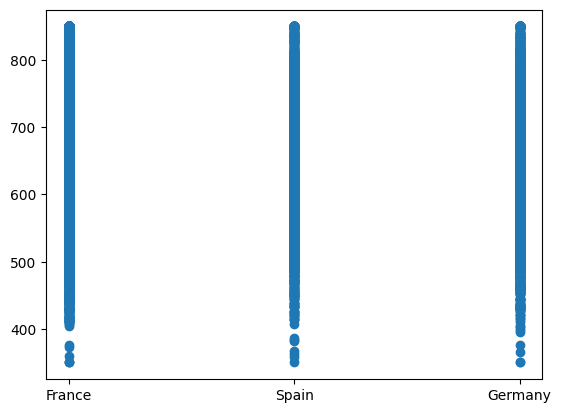

In [ ]:
plt.scatter(df.Geography, df.CreditScore)

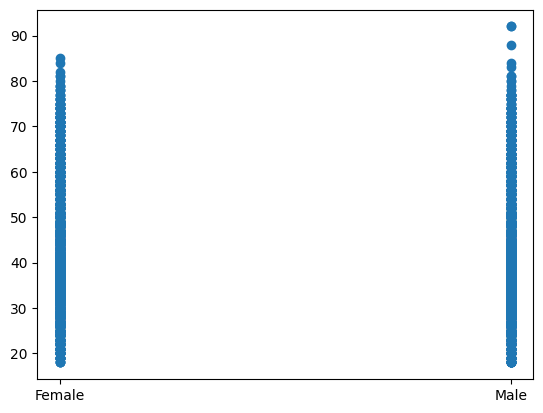

In [ ]:
plt.scatter(df.Gender, df.Age)

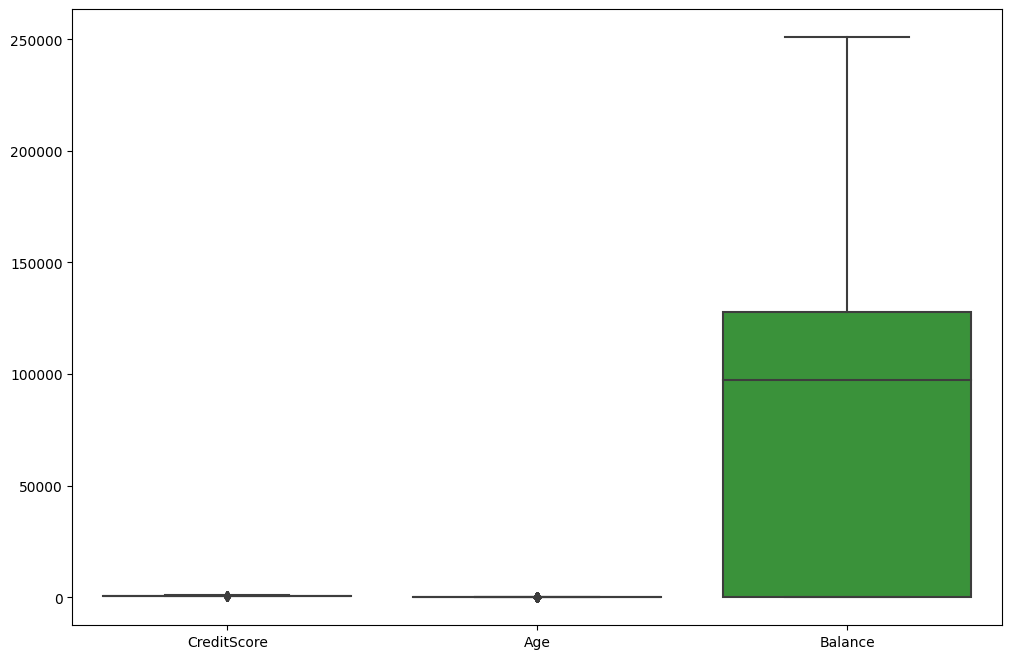

In [ ]:
# Box plots for numeric variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['CreditScore', 'Age', 'Balance']])
plt.show()

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:,:-1].values

In [ ]:
X

array([[4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.2000000e+01, 8.0000000e+00, 1.5966080e+05, 3.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [3.6000000e+01, 7.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.2000000e+01, 3.0000000e+00, 7.5075310e+04, 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.8000000e+01, 4.0000000e+00, 1.3014279e+05, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [ ]:
y

array([[619, 'France', 'Female', ..., 1, 1, 1],
       [608, 'Spain', 'Female', ..., 1, 0, 1],
       [502, 'France', 'Female', ..., 3, 1, 0],
       ...,
       [709, 'France', 'Female', ..., 1, 0, 1],
       [772, 'Germany', 'Male', ..., 2, 1, 0],
       [792, 'France', 'Female', ..., 1, 1, 0]], dtype=object)

In [ ]:
#Categorical Data - Gender - Label Encoder


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
#categorical data - Geography - Onehotencoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
#train and test data


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#feature Selection

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Part 2: Artificial Neural Network


In [ ]:
import tensorflow as tf
#tensorflow is

In [ ]:
tf.__version__

'2.13.0'

In [ ]:
#Building ANN

In [ ]:
#Initializing ANN

In [ ]:
ann = tf.keras.models.Sequential()
#this is required steps

In [ ]:
#ADding first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu'))

In [ ]:
#ADding second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu'))

In [ ]:
#ADding third hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units = 1, activation= 'sigmoid'))

In [ ]:
#adding output layer

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#training the ANN on the training set

In [ ]:
ann.fit(X_train, y_train, batch_size=32, epochs=15)

RuntimeError: ignored